In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .appName("Python Spark create RDD example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
df = spark.sparkContext\
          .parallelize([(1, 2, 3, 'a b c'),
                        (4, 5, 6, 'd e f'),
                        (7, 8, 9, 'g h i')])\
          .toDF(['col1', 'col2', 'col3','col4'])

In [2]:
df.show()

+----+----+----+-----+
|col1|col2|col3| col4|
+----+----+----+-----+
|   1|   2|   3|a b c|
|   4|   5|   6|d e f|
|   7|   8|   9|g h i|
+----+----+----+-----+



In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
df = spark.read.format('com.databricks.spark.csv').\
                options(header='true', \
                inferschema='true').\
                load("datasets_1256_2242_train.csv",header=True)
df.show(5)
df.printSchema()


+----+-----------+
|   x|          y|
+----+-----------+
|24.0|21.54945196|
|50.0|47.46446305|
|15.0|17.21865634|
|38.0|36.58639803|
|87.0|87.28898389|
+----+-----------+
only showing top 5 rows

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)



In [4]:
from pyspark.sql import  SparkSession


spark = SparkSession\
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
df = spark.sparkContext.parallelize([(1,2,3,4,5),(6,7,8,9,10)])
df.collect()

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]

In [5]:
from pyspark.sql import  SparkSession

spark = SparkSession\
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
df = spark.createDataFrame([('1','Maneesh','20000','1'),
                            ('2','Rahul','30000','2')],
                          ['id','Name','Salary','DEPT'])

In [6]:
df.show()

+---+-------+------+----+
| id|   Name|Salary|DEPT|
+---+-------+------+----+
|  1|Maneesh| 20000|   1|
|  2|  Rahul| 30000|   2|
+---+-------+------+----+



In [7]:
df

DataFrame[id: string, Name: string, Salary: string, DEPT: string]

In [8]:
import pandas as pd
df = pd.DataFrame([(1,2,3,4,5),(1,2,3,4,5)],columns= ['qwe','asd','zxc','gjh','afg'])

In [9]:
df

,qwe,asd,zxc,gjh,afg
0,1,2,3,4,5
1,1,2,3,4,5


In [10]:
my_list = [['a', 1, 2], ['b', 2, 3],['c', 3, 4]]
col_name = ['A', 'B', 'C']

In [11]:
#differnent etween rdd.dataframe and pd.Dataframe

import pandas as pd 
from pyspark.sql import SparkSession


print(pd.DataFrame(my_list,columns = col_name))
spark.createDataFrame(my_list, col_name).show()

   A  B  C
0  a  1  2
1  b  2  3
2  c  3  4
+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



In [28]:
my_list = [[1,2],[2,3],[3,4],[4,5],[5,6],[6,798]]
col_name  = ['list_1', 'list_2']

In [29]:
from pyspark.sql import SparkSession
df = spark.createDataFrame(my_list,col_name)

In [30]:
df.show()

+------+------+
|list_1|list_2|
+------+------+
|     1|     2|
|     2|     3|
|     3|     4|
|     4|     5|
|     5|     6|
|     6|   798|
+------+------+



In [31]:
df.select(col_name).describe().show()

+-------+------------------+------------------+
|summary|            list_1|            list_2|
+-------+------------------+------------------+
|  count|                 6|                 6|
|   mean|               3.5|136.33333333333334|
| stddev|1.8708286933869707| 324.1522276133031|
|    min|                 1|                 2|
|    max|                 6|               798|
+-------+------------------+------------------+



In [32]:
import numpy as np
import pandas as pd 

In [33]:
def deccribe_data(df_in, columns, deciles = False):
    
    if deciles:
        percentiles = np.array(range(0, 110, 10))
    else:
        percentiles = [25,50,75]
        
    percs = np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns=columns)
    percs['summary'] = [str(p) + '%' for p in percentiles]
    spark_describe = df_in.describe().toPandas()
    new_df = pd.concat([spark_describe, percs],ignore_index=True)
    new_df = new_df.round(2)
    return new_df[['summary'] + columns]


In [34]:
deccribe_data(df,col_name)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,summary,list_1,list_2
0,count,6,6
1,mean,3.5,136.33333333333334
2,stddev,1.8708286933869707,324.1522276133031
3,min,1,2
4,max,6,798
5,25%,2.25,3.25
6,50%,3.5,4.5
7,75%,4.75,5.75


In [22]:
# Data to plot
labels = plot_data.age_class
sizes = plot_data.Percent
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0, 0.1, 0, 0,0,0) # explode 1st slice
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


NameError: name 'plot_data' is not defined

In [35]:
from pyspark.mllib.stat import Statistics
import pandas as pd 

corr_data = df.select(col_name)
col_name = df.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_name, col_name
print(corr_df.to_string())


          list_1    list_2
list_1  1.000000  0.657945
list_2  0.657945  1.000000


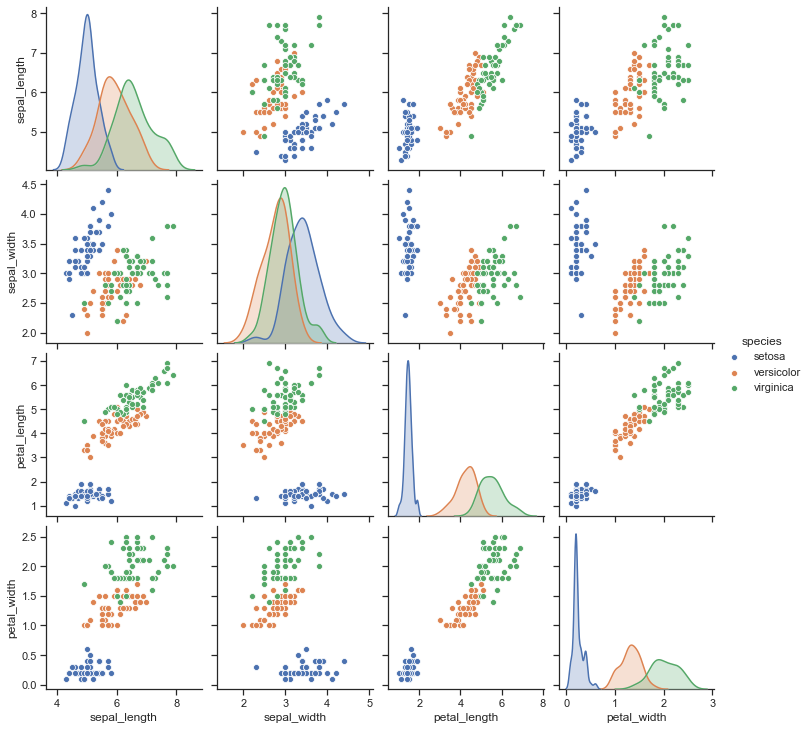

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
plt.show()

In [41]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest
data = [(0.0, Vectors.dense(0.5, 10.0)),
(0.0, Vectors.dense(1.5, 20.0)),
(1.0, Vectors.dense(1.5, 30.0)),
(0.0, Vectors.dense(3.5, 30.0)),
(0.0, Vectors.dense(3.5, 40.0)),
(1.0, Vectors.dense(3.5, 40.0))]
df = spark.createDataFrame(data, ["label", "features"])
df.show()
r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

+-----+----------+
|label|  features|
+-----+----------+
|  0.0|[0.5,10.0]|
|  0.0|[1.5,20.0]|
|  1.0|[1.5,30.0]|
|  0.0|[3.5,30.0]|
|  0.0|[3.5,40.0]|
|  1.0|[3.5,40.0]|
+-----+----------+

pValues: [0.6872892787909721,0.6822703303362126]
degreesOfFreedom: [2, 3]
statistics: [0.75,1.5]


In [43]:
df.stat.crosstab("label" , "features").show()

+--------------+----------+----------+----------+----------+----------+
|label_features|[0.5,10.0]|[1.5,20.0]|[1.5,30.0]|[3.5,30.0]|[3.5,40.0]|
+--------------+----------+----------+----------+----------+----------+
|           1.0|         0|         0|         1|         0|         1|
|           0.0|         1|         1|         0|         1|         1|
+--------------+----------+----------+----------+----------+----------+



In [2]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

sentenceData = spark.createDataFrame([
                                        (0, "Python python Spark Spark"),
                                        (1, "Python SQL")],
                                        ["document", "sentence"])
sentenceData.show()
tokenizer = Tokenizer(inputCol = "sentence",outputCol = "words")
vectorizer = CountVectorizer(inputCol="words", outputCol="rawFeatures")
idf = IDF(inputCol="rawFeatures", outputCol="features")
pipeline = Pipeline(stages=[tokenizer, vectorizer, idf])
model = pipeline.fit(sentenceData)



+--------+--------------------+
|document|            sentence|
+--------+--------------------+
|       0|Python python Spa...|
|       1|          Python SQL|
+--------+--------------------+



In [18]:
import numpy as np
total_counts = model.transform(sentenceData)\
.select('rawFeatures').rdd\
.map(lambda row: row['rawFeatures'].toArray())\
.reduce(lambda x,y: [x[i]+y[i] for i in range(len(y))])
vocabList = model.stages[1].vocabulary
d = {'vocabList':vocabList,'counts':total_counts}
spark.createDataFrame(np.array(list(d.values())).T.tolist(),list(d.keys())).show()



+---------+------+
|vocabList|counts|
+---------+------+
|   python|   3.0|
|    spark|   2.0|
|      sql|   1.0|
+---------+------+



In [17]:
#Linear Regression using pyspark

from pyspark.sql import SparkSession


spark = SparkSession\
.builder \
.appName("pyspark regression example")\
.config("spark.some.config.option", "some-value")\
.getOrCreate()

df = spark.read.csv("datasets_1256_2242_train.csv",header = True,inferSchema=True)

df.show(5)
df.printSchema()



+----+-----------+
|   x|          y|
+----+-----------+
|24.0|21.54945196|
|50.0|47.46446305|
|15.0|17.21865634|
|38.0|36.58639803|
|87.0|87.28898389|
+----+-----------+
only showing top 5 rows

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)



In [7]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
df = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("datasets_1256_2242_train.csv",header=True)
df.show(5)
df.printSchema()


+----+-----------+
|   x|          y|
+----+-----------+
|24.0|21.54945196|
|50.0|47.46446305|
|15.0|17.21865634|
|38.0|36.58639803|
|87.0|87.28898389|
+----+-----------+
only showing top 5 rows

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)

